In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
from category_encoders import TargetEncoder, CatBoostEncoder, LeaveOneOutEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold

/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('dataset.csv', index_col=0)
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [3]:
df.isna().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [4]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
popularity,114000.0,33.238535,22.305078,0.000,17.00000,35.000000,50.0000,100.000
duration_ms,114000.0,228029.153114,107297.712645,0.000,174066.00000,212906.000000,261506.0000,5237295.000
danceability,114000.0,0.566800,0.173542,0.000,0.45600,0.580000,0.6950,0.985
energy,114000.0,0.641383,0.251529,0.000,0.47200,0.685000,0.8540,1.000
key,114000.0,5.309140,3.559987,0.000,2.00000,5.000000,8.0000,11.000
loudness,114000.0,-8.258960,5.029337,-49.531,-10.01300,-7.004000,-5.0030,4.532
mode,114000.0,0.637553,0.480709,0.000,0.00000,1.000000,1.0000,1.000
speechiness,114000.0,0.084652,0.105732,0.000,0.03590,0.048900,0.0845,0.965
acousticness,114000.0,0.314910,0.332523,0.000,0.01690,0.169000,0.5980,0.996
instrumentalness,114000.0,0.156050,0.309555,0.000,0.00000,0.000042,0.0490,1.000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [7]:
print(len(df['track_id']))
print(len(df['track_id'].unique()))

114000
89741


In [8]:
# As we can see we have duplicated rows

In [9]:
df.drop_duplicates(subset=['track_id'],inplace=True)

In [10]:
print(len(df['track_id']))

89741


In [11]:
# Now we have only unique rows with unique track ids

In [12]:
df.describe(include=['object','bool'])

,track_id,artists,album_name,track_name,explicit,track_genre
count,89741,89740,89740,89740,89741,89741
unique,89741,31437,46589,73608,2,113
top,5SuOikwiRyPMVoIQDJUgSV,George Jones,The Complete Hank Williams,Rockin' Around The Christmas Tree,False,acoustic
freq,1,260,110,48,82037,1000


In [13]:
df.describe(include=['object','bool']).transpose()

,count,unique,top,freq
track_id,89741,89741,5SuOikwiRyPMVoIQDJUgSV,1
artists,89740,31437,George Jones,260
album_name,89740,46589,The Complete Hank Williams,110
track_name,89740,73608,Rockin' Around The Christmas Tree,48
explicit,89741,2,False,82037
track_genre,89741,113,acoustic,1000


In [14]:
# now we can use one-hot encoding to combine the track_id and genere to make them more specific and int so we can analyze them

In [15]:
updated_df_id_genere = pd.get_dummies(df[['track_id','track_genre']], columns = ['track_genre'], dtype=int)

In [16]:
# now we should combine this updated_df with original df 

In [17]:
df = pd.concat([df,updated_df_id_genere], axis =1)

In [18]:
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0,0,0,0,0,0,0,0,0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,0,0,0,0,0,0,0,0,0,0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,0,0,0,0,0,0,0,0,0,0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,0,0,0,0,0,0,0,0,0,0
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# now we should drop track_id and track_genre

In [20]:
df.drop(['track_id','track_genre'],axis= 1,  inplace = True)

In [21]:
df.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,...,0,0,0,0,0,0,0,0,0,0
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,...,0,0,0,0,0,0,0,0,0,0
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,...,0,0,0,0,0,0,0,0,0,0
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,...,0,0,0,0,0,0,0,0,0,0
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# Now we can check our df

In [23]:
df.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89741 entries, 0 to 113999
Data columns (total 131 columns):
 #    Column                         Dtype  
---   ------                         -----  
 0    artists                        object 
 1    album_name                     object 
 2    track_name                     object 
 3    popularity                     int64  
 4    duration_ms                    int64  
 5    explicit                       bool   
 6    danceability                   float64
 7    energy                         float64
 8    key                            int64  
 9    loudness                       float64
 10   mode                           int64  
 11   speechiness                    float64
 12   acousticness                   float64
 13   instrumentalness               float64
 14   liveness                       float64
 15   valence                        float64
 16   tempo                          float64
 17   time_signature              

In [24]:
df.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,...,0,0,0,0,0,0,0,0,0,0
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,...,0,0,0,0,0,0,0,0,0,0
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,...,0,0,0,0,0,0,0,0,0,0
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,...,0,0,0,0,0,0,0,0,0,0
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,...,0,0,0,0,0,0,0,0,0,0


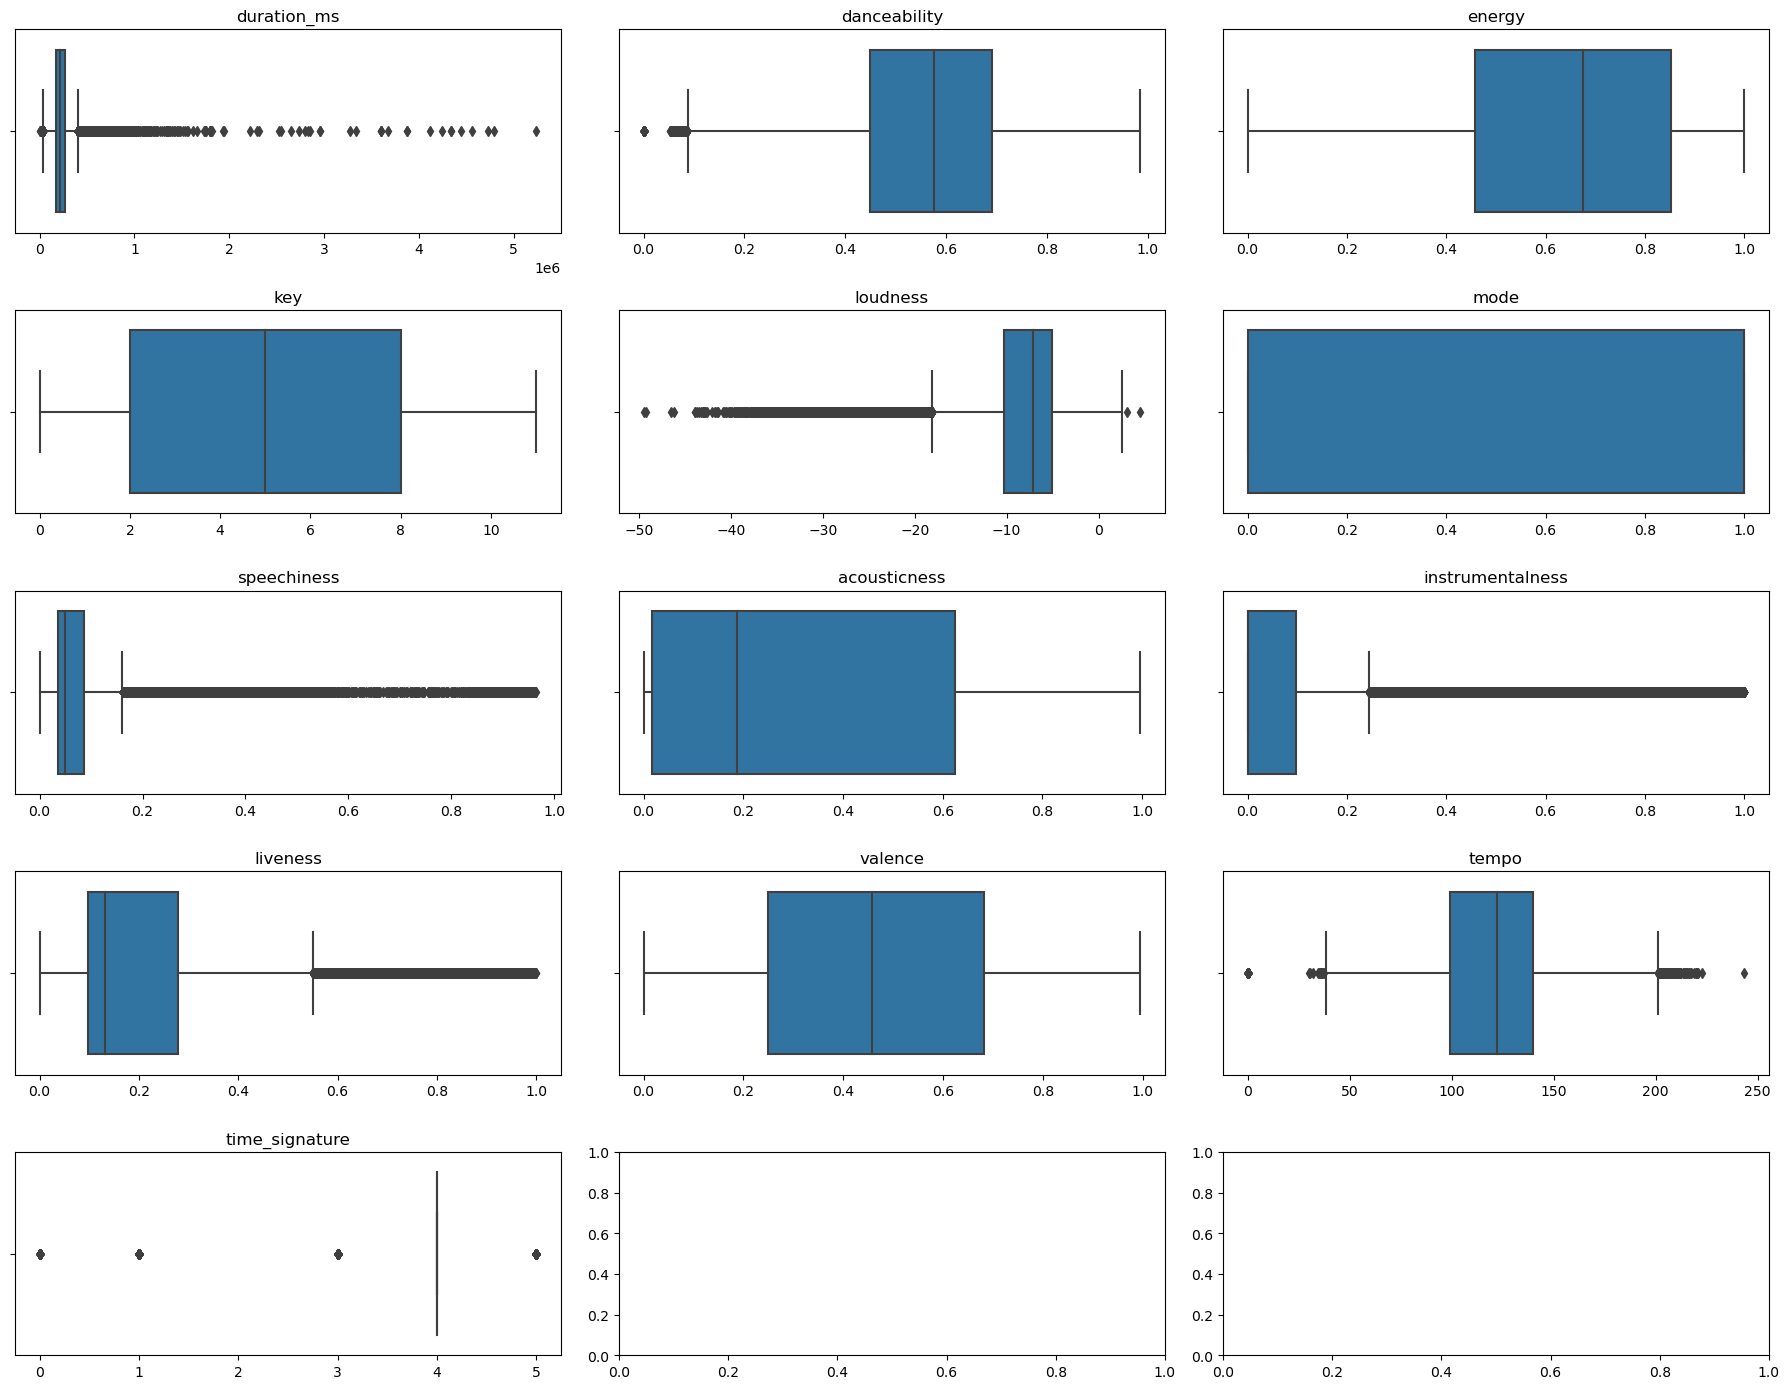

In [25]:
# Create figure and axes for the subplots with a larger size for better readability
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 14))  # Increased size to (18, 14)

# List of columns to be plotted
columns_of_interest = [
    'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'time_signature'
]

# Loop over the columns of interest and create a boxplot for each
for i, column in enumerate(columns_of_interest):
    row, col = divmod(i, 3)
    sns.boxplot(x=df[column], ax=axes[row, col])
    axes[row, col].set_title(column, fontsize=12)  # Set title with a larger font size for better readability
    axes[row, col].set_xlabel('')  # Remove the x-axis label for a cleaner look

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


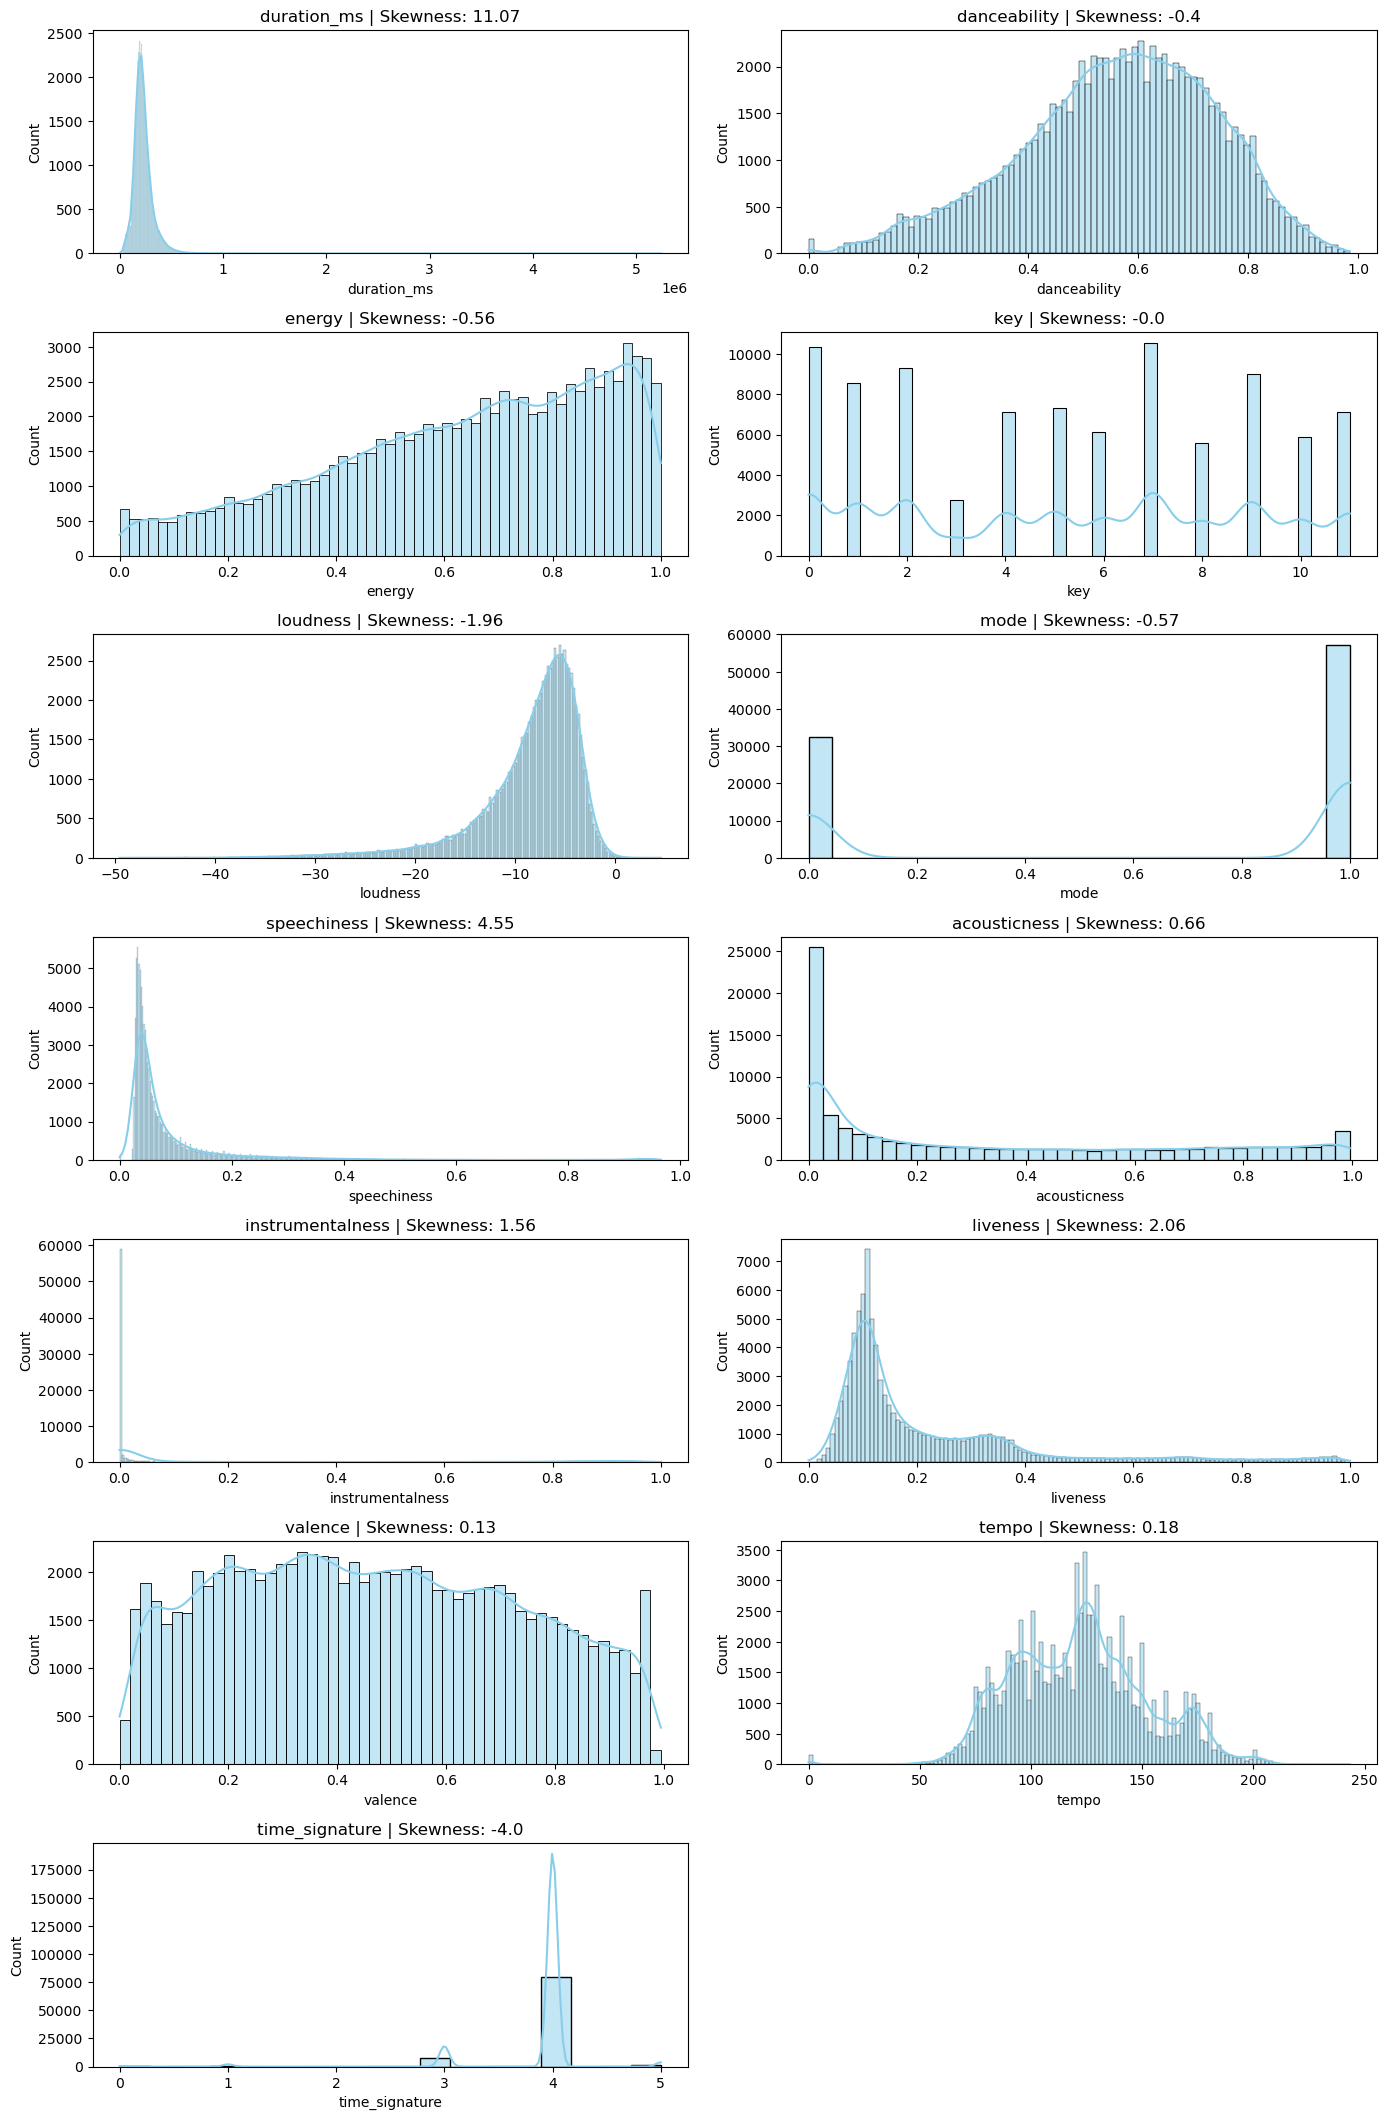

In [26]:
Numeric_variables = df[['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
                        'speechiness', 'acousticness', 'instrumentalness', 'liveness',
                        'valence', 'tempo', 'time_signature']]

plt.figure(figsize=(14, len(Numeric_variables.columns) * 3))

for index, feature in enumerate(Numeric_variables.columns, 1):
    plt.subplot(len(Numeric_variables.columns), 2, index)
    sns.histplot(df[feature], kde=True, color='skyblue')  # Changed color to 'skyblue'
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()


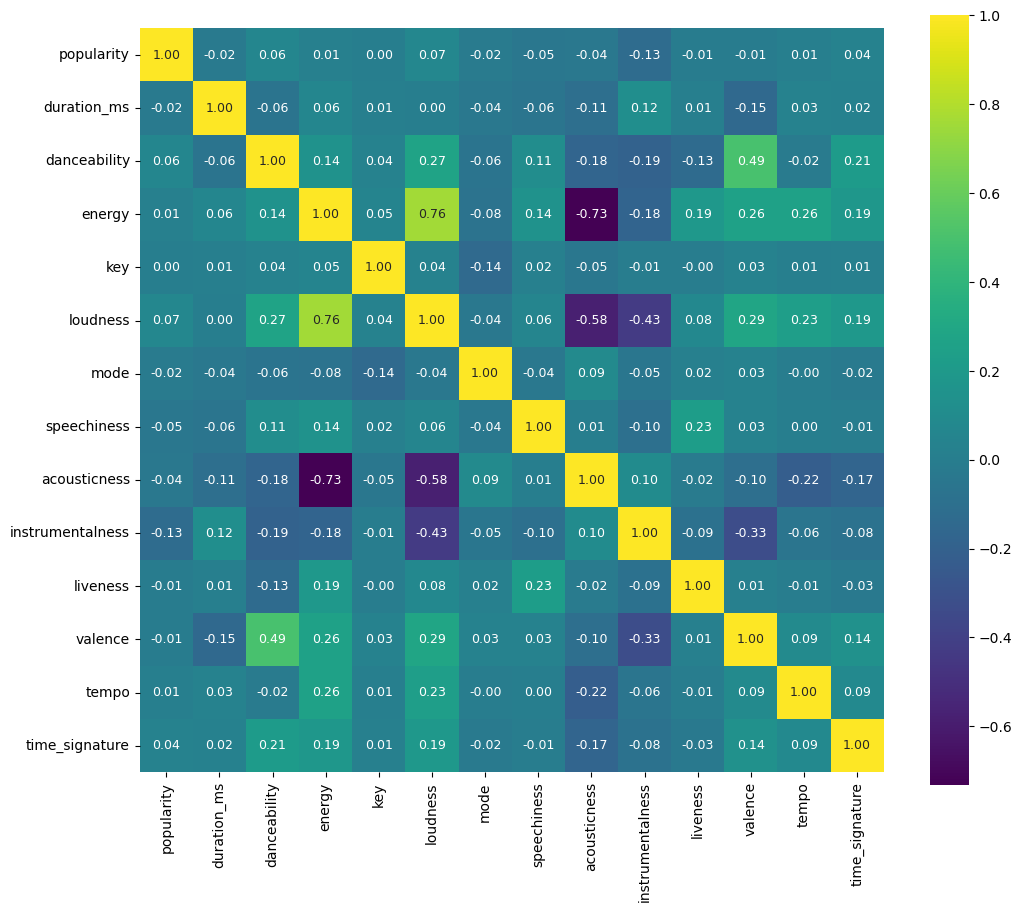

In [27]:
Categoric_variables = ['artists', 'album_name', 'track_name', 'explicit'] \
          + [i for i in df.columns if i.startswith('track_genre_')]

corrmat = df.drop(columns=Categoric_variables).corr()  

fig, ax = plt.subplots(figsize=(12, 10))  # Adjusted the figure size for better readability
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 9}, 
                 yticklabels=corrmat.columns, 
                 xticklabels=corrmat.columns,
                 cmap="viridis")  # Changed color map to 'viridis'
plt.show()


In [28]:
Explicit= pd.get_dummies(df['explicit'],drop_first=True, prefix='explicit')

In [29]:
df.drop('explicit', axis= 1 , inplace = True)

In [30]:
df = pd.concat([df,Explicit], axis =1)

In [31]:
df.head()

,artists,album_name,track_name,popularity,duration_ms,danceability,energy,key,loudness,mode,...,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music,explicit_True
0,Gen Hoshino,Comedy,Comedy,73,230666,0.676,0.4610,1,-6.746,0,...,0,0,0,0,0,0,0,0,0,0
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0.420,0.1660,1,-17.235,1,...,0,0,0,0,0,0,0,0,0,0
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0.438,0.3590,0,-9.734,1,...,0,0,0,0,0,0,0,0,0,0
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0.266,0.0596,0,-18.515,1,...,0,0,0,0,0,0,0,0,0,0
4,Chord Overstreet,Hold On,Hold On,82,198853,0.618,0.4430,2,-9.681,1,...,0,0,0,0,0,0,0,0,0,0


In [32]:
target_encoder = ce.TargetEncoder(cols=['artists', 'album_name', 'track_name'])
df_target = target_encoder.fit_transform(df, df['popularity'])

In [33]:
df_target.head()

,artists,album_name,track_name,popularity,duration_ms,danceability,energy,key,loudness,mode,...,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music,explicit_True
0,37.133290,38.376958,38.376958,73,230666,0.676,0.4610,1,-6.746,0,...,0,0,0,0,0,0,0,0,0,0
1,35.202297,36.035006,35.368981,55,149610,0.420,0.1660,1,-17.235,1,...,0,0,0,0,0,0,0,0,0,0
2,36.295223,36.295223,36.295223,57,210826,0.438,0.3590,0,-9.734,1,...,0,0,0,0,0,0,0,0,0,0
3,41.026704,38.116741,37.649906,71,201933,0.266,0.0596,0,-18.515,1,...,0,0,0,0,0,0,0,0,0,0
4,35.663702,34.346080,37.319500,82,198853,0.618,0.4430,2,-9.681,1,...,0,0,0,0,0,0,0,0,0,0


In [34]:
d_columns = df_target.columns.duplicated()

if True in d_columns:
    print(d_columns)
else:
    print("noting found!")

noting found!


In [35]:
d_rows = df_target.duplicated()

if True in d_rows:
    print("duplicated_rows")
else:
    print("nothing found")

duplicated_rows


In [36]:
X = df_target.drop('popularity', axis =1 )
y = df_target['popularity']

In [37]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
numerical_features = ['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
                'speechiness', 'acousticness', 'instrumentalness', 'liveness',
                'valence', 'tempo', 'time_signature']

In [40]:
scaler = StandardScaler() # Initialization of the scaler
scaler.fit(X_train[numerical_features]) # Fit on the training set

X_train[numerical_features] = scaler.transform(X_train[numerical_features]) # Scale the training set
X_test[numerical_features] = scaler.transform(X_test[numerical_features]) # Scale the test set 

In [41]:
X_train_numerical = X_train[numerical_features]
X_test_numerical = X_test[numerical_features]

In [42]:
# Now we need to write the Ridge Regression code to start our evaluation

In [43]:
class RidgeRegression:
    """
    Ridge Regression model implementation with methods for fitting, predicting,
    and evaluating the model using mean squared error (MSE), R-squared, and
    cross-validation.
    """

    def __init__(self, alpha=1.0):
        """
        Initialize RidgeRegression object with a regularization parameter alpha.

        Args:
        - alpha: Regularization parameter (default is 1.0).
        """
        self.alpha = alpha
        self.weights_ = None
        self.intercept_ = None

    def fit(self, X, y):
        """
        Fit the Ridge Regression model to the given data.

        Args:
        - X: Features matrix.
        - y: Target values.
        
        Returns:
        - An array-like with the coefficients estimate.

        This method computes the coefficients of the Ridge Regression model
        using the closed-form solution.
        """
        y = y.values.reshape(-1, 1)  # Ensure y is a column vector
        self.intercept_ = np.ones((X.shape[0], 1))  # Compute intercept with 1 on each row
        Xi = np.c_[self.intercept_, X]  # Add column of ones for intercept to the X matrix
        XTX = Xi.T @ Xi  # Compute X^T*X
        XTy = Xi.T @ y  # Compute X^T*y
        I = np.identity(Xi.shape[1])  # Identity matrix
        I[0][0] = 0  # Set first element to 0 to avoid regularization for intercept
        self.weights_ = np.linalg.inv(XTX + self.alpha * I) @ XTy  # Compute weights
        return self.weights_

    def predict(self, X):
        """
        Make predictions using the fitted Ridge Regression model.

        Args:
        - X: Feature matrix for prediction.

        Returns:
        - An array-like with predicted target values.

        This method computes predictions using the learned coefficients.
        """
        intercept = np.ones((X.shape[0], 1))
        X = np.c_[intercept, X]  # Add column of ones for intercept to X matrix
        return (X @ self.weights_).reshape(-1)

    def mse(self, predictions, targets):
        """
        Compute the mean squared error (MSE) between predictions and targets.

        Args:
        - predictions: Predicted values.
        - targets: True target values.

        Returns:
        - Mean squared error.

        This method computes the MSE between predicted and true target values.
        """
        predictions = predictions.reshape(-1)
        targets = targets.values.reshape(-1) if isinstance(targets, pd.DataFrame) or isinstance(targets, pd.Series) else targets.reshape(-1)
        return np.mean((predictions - targets) ** 2)  # Compute MSE = (∑(ŷ_i - y_i)^2)/n

    def r_squared(self, predictions, targets):
        """
        Compute the R-squared coefficient of determination.

        Args:
        - predictions: predicted values.
        - targets: true target values.

        Returns:
        - R-squared value.

        This method computes the R-squared coefficient of determination.
        """
        targets = targets.values.reshape(-1) if isinstance(targets, pd.DataFrame) or isinstance(targets, pd.Series) else targets.reshape(-1)
        predictions = predictions.reshape(-1)
        RSS = np.sum((targets - predictions) ** 2) # Compute the Residual Sum of Squares
        TSS = np.sum((targets - np.mean(targets)) ** 2) # Compute the Total Sum of Squares
        return 1 - (RSS / TSS)


    def cross_validation(self, X, y, alpha_values, n_splits=5):
            """
            Perform k-fold cross-validation to estimate model performance
            for different alpha values.

            Args:
            - X: Feature matrix.
            - y: Target values.
            - alpha_values: List or array of alpha values to test.
            - n_splits: Number of folds for cross-validation (default is 5).

            Returns:
            - Dictionary containing alpha values as keys and average MSE across all folds as values.

            This method computes the average mean squared error (MSE) using k-fold
            cross-validation for each alpha value.
            """
            alpha_cv_mse = {}  # A dictionary to store alpha and corresponding mses
            kf = KFold(n_splits=n_splits)
            for alpha in alpha_values:
                cv_mse = []  # A list to store mses for current alpha
                for train_index, test_index in kf.split(X):
                    # Extract training and test data for the current fold
                    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
                    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

                    # Train the model on the training data
                    self.alpha = alpha  # Set current alpha value
                    self.fit(X_train_fold, y_train_fold)

                    # Make predictions on the test data
                    y_pred_fold = self.predict(X_test_fold)

                    # Calculate the error (MSE) between predictions and target values
                    fold_mse = self.mse(y_pred_fold, y_test_fold)
                    cv_mse.append(fold_mse)

                # Compute the mean of the cross-validated mses for current alpha
                average_cv_mse = np.mean(cv_mse)
                alpha_cv_mse[alpha] = average_cv_mse

            return alpha_cv_mse

In [44]:
rr_numerical = RidgeRegression()  
rr_numerical.fit(X_train_numerical, y_train)

array([[ 3.31976981e+01],
       [-4.51762739e-01],
       [ 1.72417690e+00],
       [-6.46190377e-01],
       [ 1.71599177e-02],
       [ 4.12371646e-01],
       [-3.61384206e-01],
       [-1.37943396e+00],
       [-6.40238663e-01],
       [-2.93299744e+00],
       [ 1.43867667e-01],
       [-2.25750073e+00],
       [ 1.39143929e-01],
       [ 3.77138093e-01]])

In [45]:
predictions_train_numerical = rr_numerical.predict(X_train_numerical) 
predictions_test_numerical = rr_numerical.predict(X_test_numerical)

In [46]:
mse_train_numerical = rr_numerical.mse(predictions_train_numerical, y_train) # Compute training mean squared error
mse_test_numerical = rr_numerical.mse(predictions_test_numerical, y_test) # Compute test mean squared error

In [47]:
print('Training MSE:', mse_train_numerical) 
print('Test MSE:', mse_test_numerical)

Training MSE: 411.2556333446563
Test MSE: 407.90341313895067


In [48]:
rsquared_train_numerical = rr_numerical.r_squared(predictions_train_numerical, y_train) # Compute training R^2 
rsquared_test_numerical = rr_numerical.r_squared(predictions_test_numerical, y_test) # Compute test R^2

In [49]:
print('Training R^2:', rsquared_train_numerical) 
print('Test R^2:', rsquared_test_numerical)

Training R^2: 0.03179562307572226
Test R^2: 0.03059249916258855


In [50]:
alphas = 10**np.linspace(10, -2, 100)*0.5  # A list of possible alpha values from 10^10 to 10^-2 scaled by 0.5

train_errors_numerical = []
test_errors_numerical = []    # Lists for storing errors (MSE)
train_rsquared_numerical = []
test_rsquared_numerical = []  # Lists for storing r_squareds
 
# For each alpha value fit the model and compute the mean squared error (MSE) and R^2
for alpha in alphas:
    model = RidgeRegression(alpha=alpha)
    model.fit(X_train_numerical, y_train)
    
    # Compute training MSE and R^2
    train_prediction = model.predict(X_train_numerical)
    train_mse = model.mse(train_prediction, y_train)
    train_R_2_numerical = model.r_squared(train_prediction, y_train)
    train_errors_numerical.append(train_mse)
    train_rsquared_numerical.append(train_R_2_numerical)
    
    # Compute test MSE and R^2
    test_prediction = model.predict(X_test_numerical)
    test_mse = model.mse(test_prediction, y_test)
    test_R_2_numerical = model.r_squared(test_prediction, y_test)
    test_errors_numerical.append(test_mse)
    test_rsquared_numerical.append(test_R_2_numerical)

In [51]:
ideal_min_numerical = np.argmin(test_errors_numerical) 
best_alpha_numerical = alphas[ideal_min_numerical]
print(f'The best alpha value for the Numerical dataset is {best_alpha_numerical} with a test MSE = {min(test_errors_numerical)}\
 and a Test R^2 = {max(test_rsquared_numerical)}')


The best alpha value for the Numerical dataset is 1882.4679033962318 with a test MSE = 407.87606129740595 and a Test R^2 = 0.03065750249303667


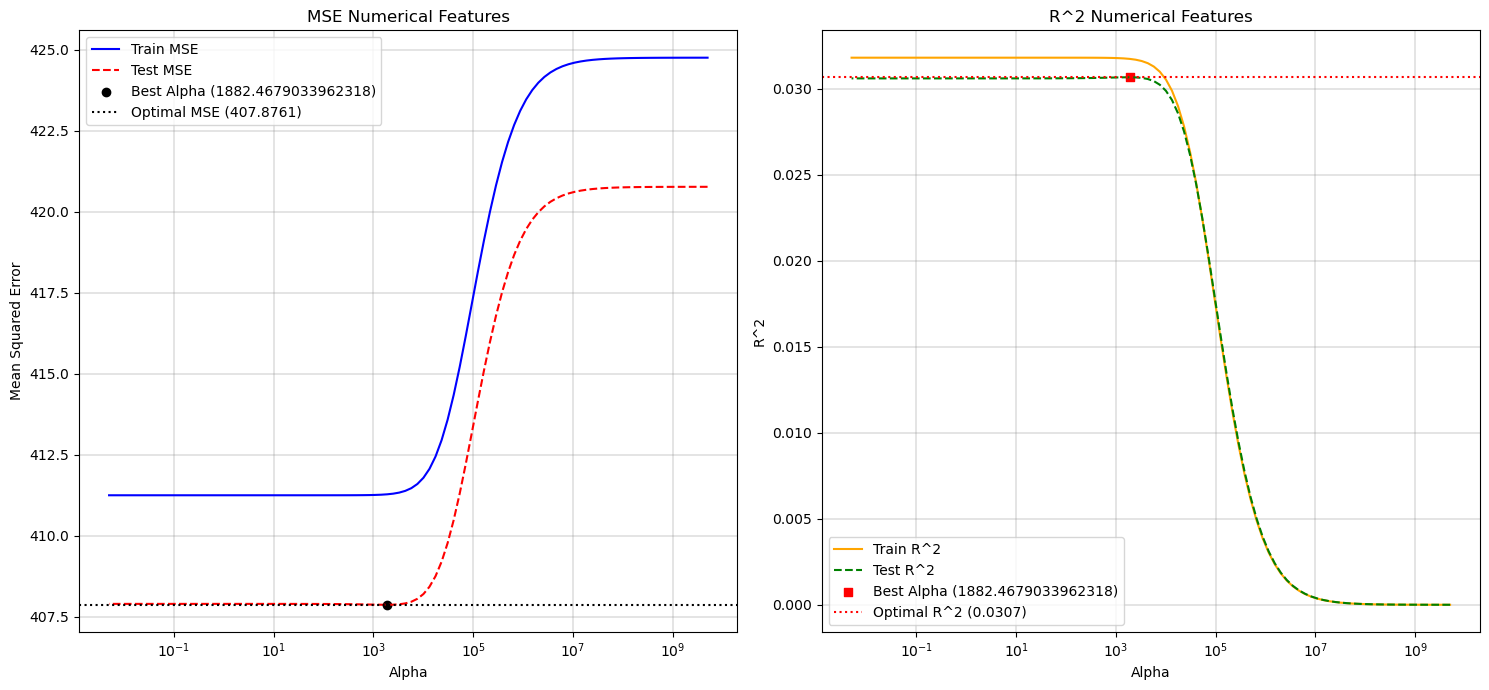

In [52]:
# Create figure and axes for both MSE and R^2 plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Set a white background
ax1.set_facecolor('white')
ax2.set_facecolor('white')

# Plot MSE
ax1.plot(alphas, train_errors_numerical, label='Train MSE', color='blue', linestyle='-')
ax1.plot(alphas, test_errors_numerical, label='Test MSE', color='red', linestyle='--')
ax1.scatter(best_alpha_numerical, min(test_errors_numerical), color='black', label=f'Best Alpha ({best_alpha_numerical})', marker='o')
ax1.axhline(y=min(test_errors_numerical), color='black', linestyle=':', label=f'Optimal MSE ({min(test_errors_numerical):.4f})')
ax1.set_xlabel('Alpha')
ax1.set_ylabel('Mean Squared Error')
ax1.set_title('MSE Numerical Features')
ax1.set_xscale('log')  # Set log scale for better visualization of alpha values
ax1.legend()
ax1.grid(visible=True, color='grey', linestyle='-', linewidth=0.3)

# Plot R^2
ax2.plot(alphas, train_rsquared_numerical, label='Train R^2', color='orange', linestyle='-')
ax2.plot(alphas, test_rsquared_numerical, label='Test R^2', color='green', linestyle='--')
ax2.scatter(best_alpha_numerical, max(test_rsquared_numerical), color='red', label=f'Best Alpha ({best_alpha_numerical})', marker='s')
ax2.axhline(y=max(test_rsquared_numerical), color='red', linestyle=':', label=f'Optimal R^2 ({max(test_rsquared_numerical):.4f})')
ax2.set_xlabel('Alpha')
ax2.set_ylabel('R^2')
ax2.set_title('R^2 Numerical Features')
ax2.set_xscale('log')  
ax2.legend()
ax2.grid(visible=True, color='grey', linestyle='-', linewidth=0.3)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [53]:
# Initialize RidgeRegression with the default alpha value
ridge_cv_numerial = RidgeRegression()

# Perform k-fold cross-validation
alpha_cv_results = ridge_cv_numerial.cross_validation(X_train_numerical, y_train, alphas)

cv_best_alpha = min(alpha_cv_results, key=alpha_cv_results.get)
cv_best_mse = alpha_cv_results[cv_best_alpha]

print("Best CV alpha value for Numerical dataset:", cv_best_alpha)
print("Corresponding average MSE:", cv_best_mse)

Best CV alpha value for Numerical dataset: 201.85086292982749
Corresponding average MSE: 411.4558197384904


In [54]:
# RR on target encoding

In [55]:
ridge = RidgeRegression()
ridge.fit(X_train, y_train) 

array([[-7.45864897e+01],
       [ 1.65466089e-01],
       [ 1.52526448e+00],
       [ 1.67401805e+00],
       [-5.77457134e-01],
       [-6.95134207e-02],
       [-4.98242823e-01],
       [ 1.77842957e-02],
       [ 5.29525040e-01],
       [ 9.19907824e-02],
       [-6.17062449e-01],
       [ 3.32899884e-01],
       [-3.59651259e-01],
       [-2.55816878e-01],
       [ 9.84293414e-02],
       [-5.41813452e-02],
       [ 2.00219730e-02],
       [ 1.39698030e+00],
       [-7.86712484e+00],
       [ 5.11794846e+00],
       [ 1.69553377e+00],
       [ 3.34057382e+00],
       [ 3.83394270e+00],
       [-8.12759521e+00],
       [-8.41009231e+00],
       [ 8.83910193e+00],
       [ 2.61236581e+00],
       [-9.18558602e+00],
       [ 2.48065259e+00],
       [-3.84500823e+00],
       [-1.28102877e+01],
       [-2.21972476e+00],
       [ 7.11636389e+00],
       [ 4.24890629e+00],
       [-4.47551474e+00],
       [-3.75013397e+00],
       [ 4.12066395e+00],
       [ 7.51463950e+00],
       [-1.5

In [56]:
predictions_train = ridge.predict(X_train) 
predictions_test = ridge.predict(X_test) 

In [57]:
mse_train = ridge.mse(predictions_train, y_train) 
mse_test = ridge.mse(predictions_test, y_test) 

In [58]:
print('Training MSE:', mse_train) 
print('Test MSE: ', mse_test)

Training MSE: 84.30662644602856
Test MSE:  83.03202183351425


In [59]:
rsquared_train = ridge.r_squared(predictions_train, y_train) 
rsquared_test = ridge.r_squared(predictions_test, y_test) 

In [60]:
print('Training R^2:' ,rsquared_train) 
print('Test R^2:' , rsquared_test)

Training R^2: 0.8015199352652818
Test R^2: 0.8026693031183704


In [61]:
train_errors = []
test_errors = []
train_rsquared = []
test_rsquared = []

for alpha in alphas:
    model = RidgeRegression(alpha=alpha)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    train_mse = model.mse(train_pred, y_train)
    train_R_2 = model.r_squared(train_pred, y_train)
    train_errors.append(train_mse)
    train_rsquared.append(train_R_2)
    
    test_pred = model.predict(X_test)
    test_mse = model.mse(test_pred, y_test)
    test_R_2 = model.r_squared(test_pred, y_test)
    test_errors.append(test_mse)
    test_rsquared.append(test_R_2)

In [62]:
ideal_min = np.argmin(test_errors)
best_alpha = alphas[ideal_min]
print(f'The best alpha value for the Target encoded dataset is {best_alpha} with a test MSE = {min(test_errors)} and\
 test R^2 = {max(test_rsquared)}')

The best alpha value for the Target encoded dataset is 3.0679536367065814 with a test MSE = 83.03103721981476 and test R^2 = 0.8026716431132686


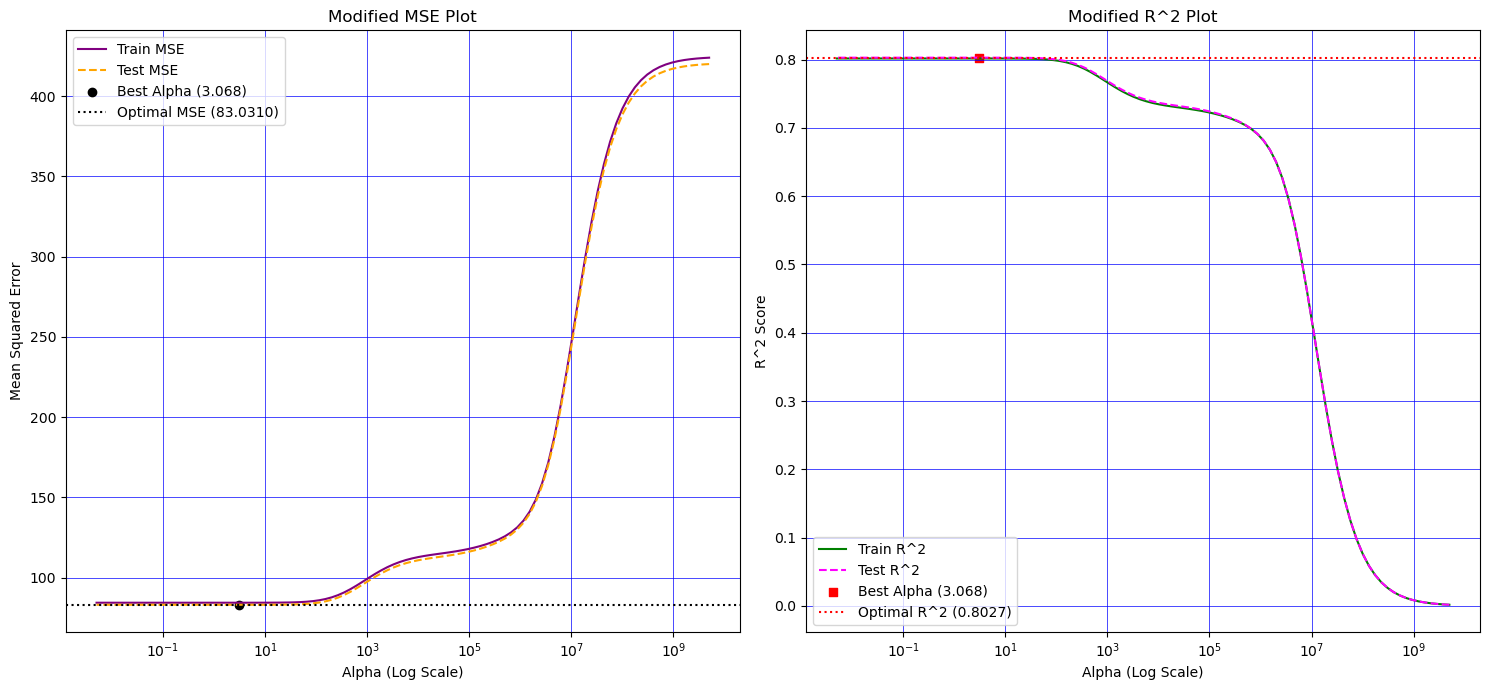

In [63]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Set a white background
ax1.set_facecolor('white')
ax2.set_facecolor('white')

# Plot MSE
ax1.plot(alphas, train_errors, label='Train MSE', color='purple', linestyle='-')
ax1.plot(alphas, test_errors, label='Test MSE', color='orange', linestyle='--')
ax1.scatter(best_alpha, min(test_errors), color='black', label=f'Best Alpha ({best_alpha:.3f})', marker='o')
ax1.axhline(y=min(test_errors), color='black', linestyle=':', label=f'Optimal MSE ({min(test_errors):.4f})')
ax1.set_xlabel('Alpha (Log Scale)')
ax1.set_ylabel('Mean Squared Error')
ax1.set_title('Modified MSE Plot')
ax1.set_xscale('log')  
ax1.legend()
ax1.grid(visible=True, color='blue', linestyle='-', linewidth=0.5)

# Plot R^2
ax2.plot(alphas, train_rsquared, label='Train R^2', color='green', linestyle='-')
ax2.plot(alphas, test_rsquared, label='Test R^2', color='magenta', linestyle='--')
ax2.scatter(best_alpha, max(test_rsquared), color='red', label=f'Best Alpha ({best_alpha:.3f})', marker='s')
ax2.axhline(y=max(test_rsquared), color='red', linestyle=':', label=f'Optimal R^2 ({max(test_rsquared):.4f})')
ax2.set_xlabel('Alpha (Log Scale)')
ax2.set_ylabel('R^2 Score')
ax2.set_title('Modified R^2 Plot')
ax2.set_xscale('log')  
ax2.legend()
ax2.grid(visible=True, color='blue', linestyle='-', linewidth=0.5)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [64]:
ridge_cv_target = RidgeRegression()

alpha_cv_results_target = ridge_cv_target.cross_validation(X_train, y_train, alphas)

cv_best_alpha_target = min(alpha_cv_results_target, key=alpha_cv_results_target.get)
cv_best_mse_target = alpha_cv_results_target[cv_best_alpha_target]

print("Best CV alpha value for Target encoded dataset:", cv_best_alpha_target)
print("Corresponding average MSE:", cv_best_mse_target)

Best CV alpha value for Target encoded dataset: 1.328043891473342
Corresponding average MSE: 84.72393514481222


In [65]:
one_out_encoder = ce.LeaveOneOutEncoder(cols=['artists', 'album_name', 'track_name'])

one_out_df = one_out_encoder.fit_transform(df, df['popularity'])

In [66]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(one_out_df.drop('popularity', axis=1),
                                                        one_out_df['popularity'],
                                                        test_size=0.3) 

In [67]:
scaler = StandardScaler()

X_train2[numerical_features] = scaler.fit_transform(X_train2[numerical_features]) 
X_test2[numerical_features] = scaler.transform(X_test2[numerical_features]) 

In [68]:
X_train2

,artists,album_name,track_name,duration_ms,danceability,energy,key,loudness,mode,speechiness,...,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music,explicit_True
42841,14.441860,12.800000,33.198438,-0.434952,-1.902746,1.411100,-1.479078,0.834380,-1.321917,1.139561,...,0,0,0,0,0,0,0,0,0,0
14047,16.735849,0.000000,19.500000,-0.436251,0.966554,1.263009,-0.916545,0.920519,0.756477,-0.291343,...,0,0,0,0,0,0,0,0,0,0
18896,25.666667,21.666667,33.198438,-0.654276,-0.176639,-0.432242,-0.072746,-1.354390,-1.321917,7.410916,...,0,0,0,0,0,0,0,0,0,1
31859,33.198438,33.198438,33.198438,0.290393,0.502486,0.051002,-1.197811,0.405029,-1.321917,-0.429616,...,0,0,0,0,0,0,0,0,0,0
94255,57.500000,58.000000,33.500000,-0.721423,0.785454,-0.136060,0.489787,0.386612,-1.321917,0.987906,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30756,33.198438,33.198438,33.198438,0.081360,0.145945,0.140636,-1.479078,0.394669,0.756477,-0.356465,...,0,0,0,0,0,0,0,0,0,0
30365,33.198438,33.198438,33.198438,-0.756419,1.000510,-0.186723,1.333586,0.655580,-1.321917,-0.357357,...,0,0,0,0,0,0,0,0,0,0
10465,33.198438,33.198438,33.198438,-0.242738,0.502486,1.368232,0.489787,1.366944,-1.321917,-0.386796,...,0,0,0,0,0,0,0,0,0,0
103361,1.065789,0.000000,0.054054,-0.744110,0.728860,0.553732,-1.479078,0.828625,0.756477,-0.474220,...,0,0,0,0,0,0,0,0,0,0


In [69]:
one_out_rr = RidgeRegression()  
one_out_rr.fit(X_train2, y_train2)  

array([[ 7.64704716e-01],
       [ 2.68546821e-01],
       [ 7.27136954e-01],
       [ 6.66677870e-02],
       [-3.76204031e-01],
       [ 3.78996059e-01],
       [-2.04721755e-01],
       [ 5.19320514e-02],
       [-4.60600866e-02],
       [-1.12797256e-01],
       [-2.30324626e-01],
       [-5.04196154e-02],
       [-2.36659708e-01],
       [-3.54239234e-01],
       [-2.65985851e-01],
       [ 5.53251891e-02],
       [ 1.76232008e-01],
       [ 1.66774564e+00],
       [-5.93048312e+00],
       [ 1.51722825e+00],
       [ 2.79828591e-01],
       [ 1.16671858e+00],
       [ 4.52726391e+00],
       [-5.60612734e+00],
       [-4.99399815e+00],
       [ 1.71872378e+00],
       [ 3.98201145e+00],
       [-7.96453790e+00],
       [ 1.32540145e+00],
       [-2.43696553e+00],
       [-1.02301508e+01],
       [-1.92462190e+00],
       [ 8.42490428e+00],
       [-3.55831952e+00],
       [-4.19921375e+00],
       [-2.17974927e+00],
       [ 1.91747213e+00],
       [ 2.16398626e+00],
       [ 2.9

In [70]:
one_out_train_prediction = one_out_rr.predict(X_train2) 
one_out_test_prediction = one_out_rr.predict(X_test2)

In [71]:
one_out_train_mse = one_out_rr.mse(one_out_train_prediction, y_train2) 
one_out_test_mse = one_out_rr.mse(one_out_test_prediction, y_test2) 

In [72]:
print(one_out_test_mse)
print(one_out_train_mse)

125.47251651236604
125.4937266731748


In [73]:
one_out_rsquared_train = one_out_rr.r_squared(one_out_train_prediction, y_train2) 
one_out_rsquared_test = one_out_rr.r_squared(one_out_test_prediction, y_test2) 

In [74]:
print(one_out_rsquared_train)
print(one_out_rsquared_test)

0.70437370700779
0.7022351089993657


In [75]:
one_out_train_errors = []
one_out_test_errors = []
one_out_train_rsquared = []
one_out_test_rsquared = []

for alpha in alphas:
    model = RidgeRegression(alpha=alpha)
    model.fit(X_train2, y_train2)
    
    one_out_train_pred = model.predict(X_train2)
    one_out_train_mse = model.mse(one_out_train_prediction, y_train2)
    one_out_train_R_2 = model.r_squared(one_out_train_prediction, y_train2)
    one_out_train_errors.append(one_out_train_mse)
    one_out_train_rsquared.append(one_out_train_R_2)
    
    one_out_test_prediction = model.predict(X_test2)
    one_out_test_mse = model.mse(one_out_test_prediction, y_test2)
    one_out_test_R2 = model.r_squared(one_out_test_prediction, y_test2)
    one_out_test_errors.append(one_out_test_mse)
    one_out_test_rsquared.append(one_out_test_R2)

In [76]:
one_out_ideal_min = np.argmin(one_out_test_errors)
one_out_best_alpha = alphas[one_out_ideal_min]

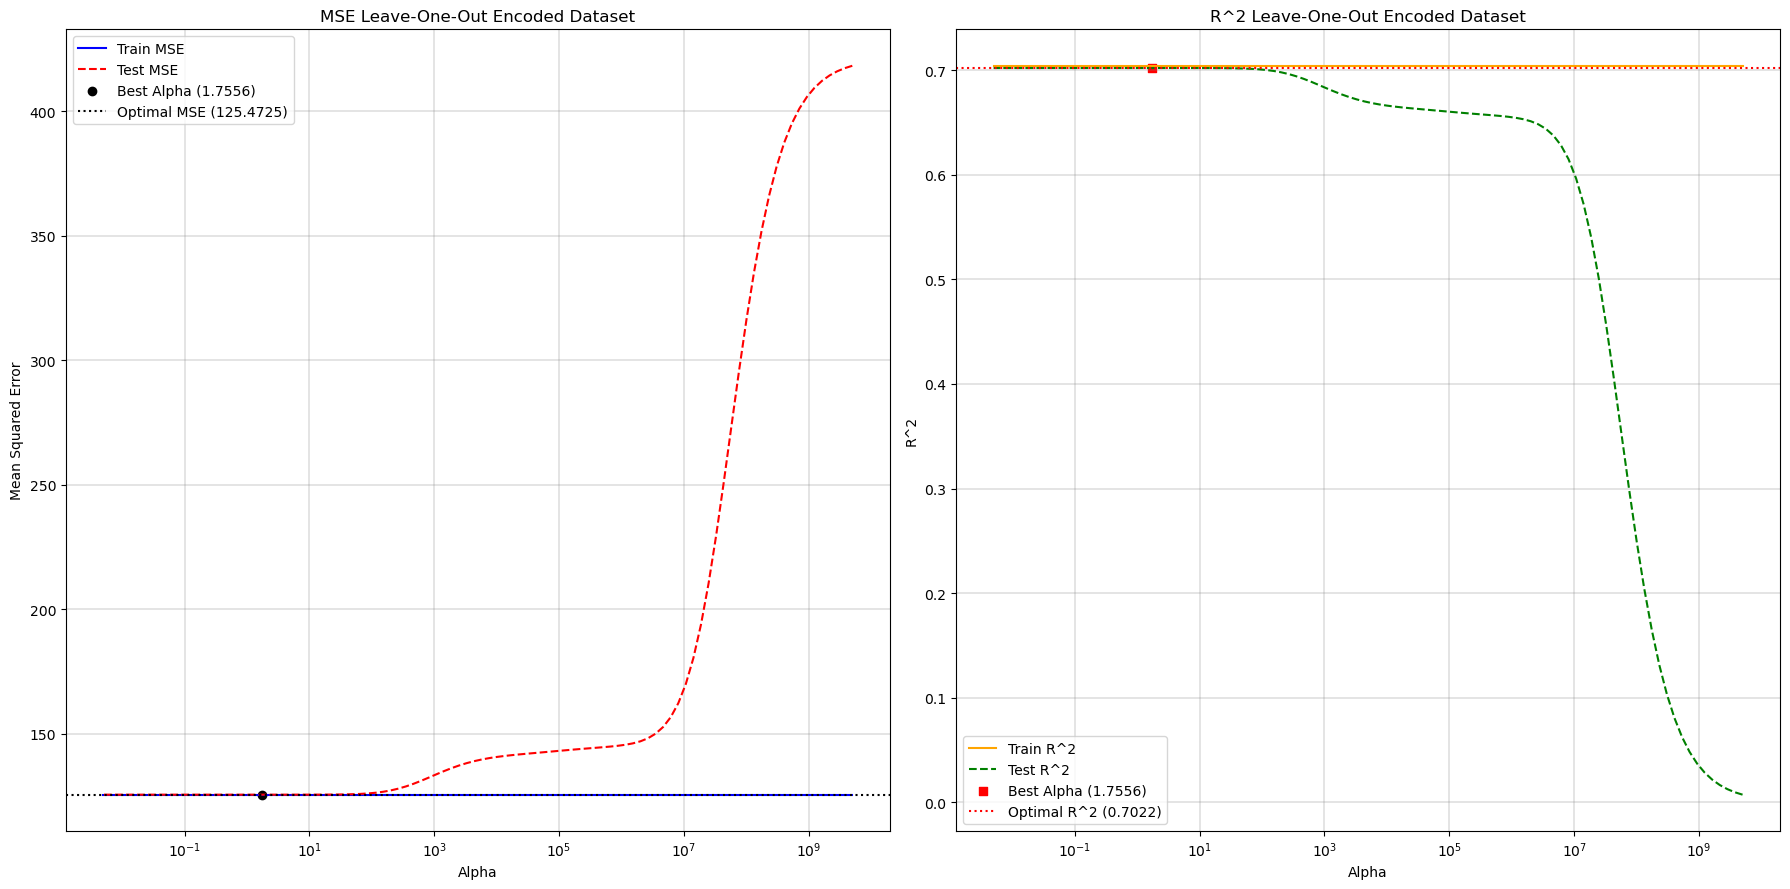

In [77]:
# Create figure and axes for both MSE and R^2 plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))  # Increased size to (18, 9)

# Set a white background
ax1.set_facecolor('white')
ax2.set_facecolor('white')

# Plot MSE
ax1.plot(alphas, one_out_train_errors, label='Train MSE', color='blue', linestyle='-')
ax1.plot(alphas, one_out_test_errors, label='Test MSE', color='red', linestyle='--')
ax1.scatter(one_out_best_alpha, min(one_out_test_errors), color='black', label=f'Best Alpha ({one_out_best_alpha:.4f})', marker='o')
ax1.axhline(y=min(one_out_test_errors), color='black', linestyle=':', label=f'Optimal MSE ({min(one_out_test_errors):.4f})')
ax1.set_xlabel('Alpha')
ax1.set_ylabel('Mean Squared Error')
ax1.set_title('MSE Leave-One-Out Encoded Dataset')
ax1.set_xscale('log')
ax1.legend()
ax1.grid(visible=True, color='grey', linestyle='-', linewidth=0.3)

# Plot R^2
ax2.plot(alphas, one_out_train_rsquared, label='Train R^2', color='orange', linestyle='-')
ax2.plot(alphas, one_out_test_rsquared, label='Test R^2', color='green', linestyle='--')
ax2.scatter(one_out_best_alpha, max(one_out_test_rsquared), color='red', label=f'Best Alpha ({one_out_best_alpha:.4f})', marker='s')
ax2.axhline(y=max(one_out_test_rsquared), color='red', linestyle=':', label=f'Optimal R^2 ({max(one_out_test_rsquared):.4f})')
ax2.set_xlabel('Alpha')
ax2.set_ylabel('R^2')
ax2.set_title('R^2 Leave-One-Out Encoded Dataset')
ax2.set_xscale('log')
ax2.legend()
ax2.grid(visible=True, color='grey', linestyle='-', linewidth=0.3)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [78]:
one_out_rr_cv = RidgeRegression()

one_out_alpha_cv_results = one_out_rr_cv.cross_validation(X_train2, y_train2, alphas)

one_out_cv_best_alpha = min(one_out_alpha_cv_results, key=one_out_alpha_cv_results.get)
one_out_cv_best_mse = one_out_alpha_cv_results[one_out_cv_best_alpha]

print("Best CV alpha value for Leave-One-Out encoded dataset:", one_out_cv_best_alpha)
print("Corresponding average MSE:", one_out_cv_best_mse)

Best CV alpha value for Leave-One-Out encoded dataset: 7.087370814634009
Corresponding average MSE: 126.15232547624812


In [79]:
# Final comparison